In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


# 1. Problem Statement

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features.

# 2. Data Gathering

In [16]:
df = pd.read_csv("Cellphone.csv")
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


# 3. EDA

In [3]:
df.shape

(161, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [5]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [6]:
df.rename({'cpu core':'cpu_core','cpu freq':'cpu_freq','internal mem':'internal_mem'}, axis=1, inplace = True)

In [7]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [8]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

<AxesSubplot: >

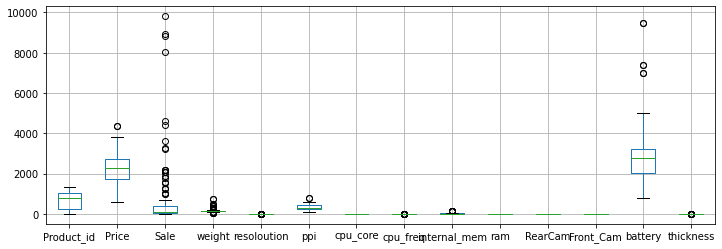

In [9]:
plt.figure(figsize = (12,4))
df.boxplot()

# 4. Feature Engineering

<AxesSubplot: xlabel='Sale', ylabel='Density'>

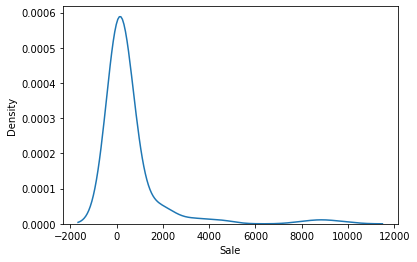

In [10]:
sns.kdeplot(df["Sale"])

<AxesSubplot: >

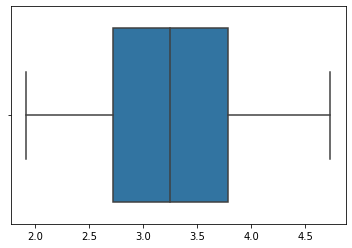

In [11]:
sns.boxplot(x = boxcox(df["Sale"])[0])

In [12]:
df["Sale"] = boxcox(x = df["Sale"])[0]

<AxesSubplot: xlabel='Sale', ylabel='Density'>

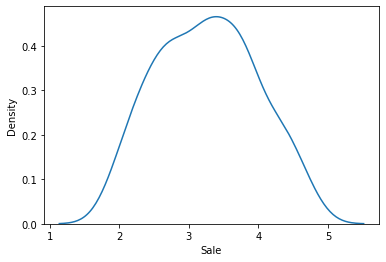

In [13]:
sns.kdeplot(df["Sale"])

<AxesSubplot: xlabel='Sale'>

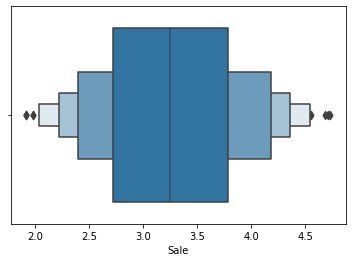

In [14]:
sns.boxenplot(x = df["Sale"])

In [15]:
q1 = df['Sale'].quantile(0.25)
q3 = df['Sale'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

5.393412132091954

In [57]:
df.loc[df['Sale'] >= upper_tail]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
137,857,3116,996,153.0,5.50,401,8,1.500,64.000,4.000,13.0,16.0,3200,7.3
138,377,2409,1009,160.0,5.00,441,4,2.300,32.000,2.000,4.0,5.0,2600,9.4
139,377,2409,1043,160.0,5.00,441,4,2.300,32.000,2.000,4.0,5.0,2600,9.4
140,701,628,1224,102.9,2.20,128,0,0.000,0.256,0.128,1.3,0.0,950,18.5
141,701,628,1274,102.9,2.20,128,0,0.000,0.256,0.128,1.3,0.0,950,18.5
142,1161,2508,1530,152.0,5.20,424,4,2.500,16.000,3.000,20.7,2.2,3100,7.3
143,1161,2508,1584,152.0,5.20,424,4,2.500,16.000,3.000,20.7,2.2,3100,7.3
144,32,1921,1781,179.0,6.00,184,4,1.300,8.000,1.000,13.0,8.0,2580,8.0
145,32,1921,1862,179.0,6.00,184,4,1.300,8.000,1.000,13.0,8.0,2580,8.0
146,1137,3102,2071,180.0,5.50,806,8,1.750,32.000,3.000,23.0,5.1,3430,7.8


In [58]:
df.loc[df['Sale'] <= lower_tail]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


<AxesSubplot: xlabel='Sale'>

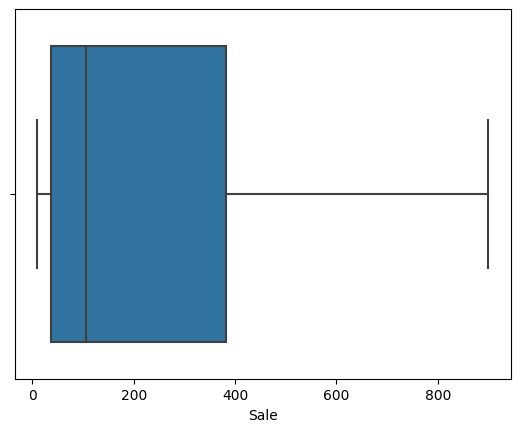

In [59]:
df['Sale'] = np.where(df['Sale'] >= upper_tail, upper_tail, df['Sale'])
sns.boxplot(x = df['Sale'])

<AxesSubplot: xlabel='Sale', ylabel='Density'>

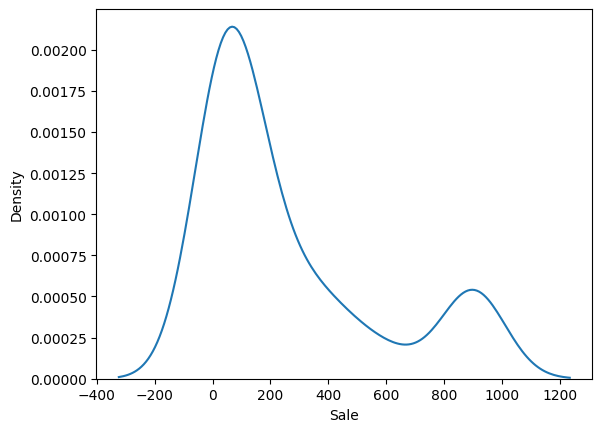

In [60]:
sns.kdeplot(df["Sale"])

<AxesSubplot: xlabel='Sale'>

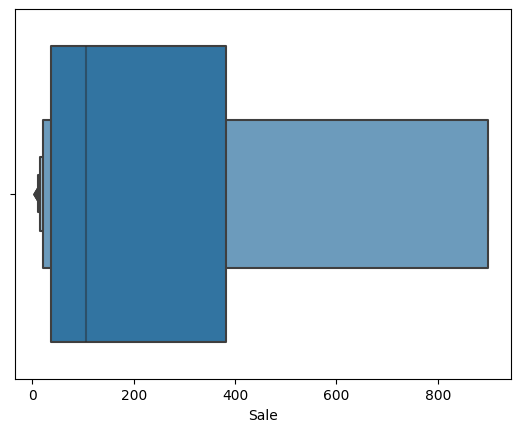

In [64]:
sns.boxenplot(x= df["Sale"])

##### weight

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    float64
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 17.7 KB


<AxesSubplot: xlabel='weight'>

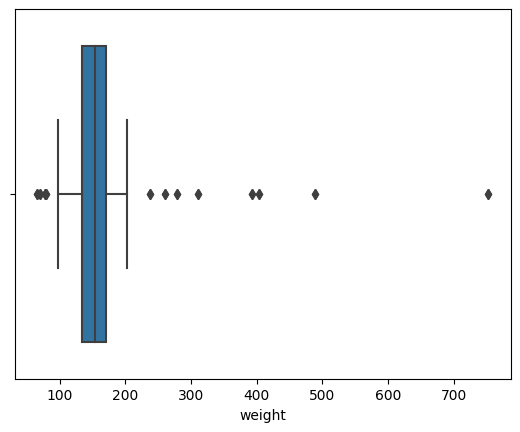

In [71]:
sns.boxplot(x = df['weight'])

<AxesSubplot: >

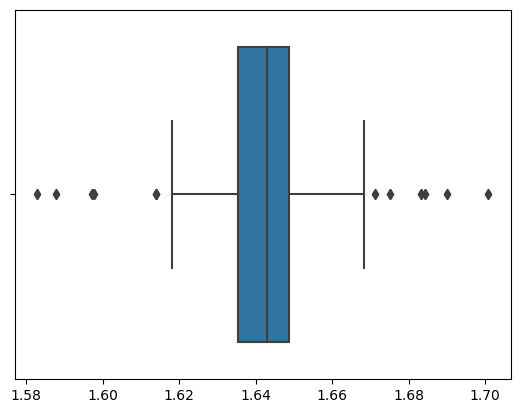

In [73]:
sns.boxplot(x = boxcox(df["weight"])[0])

In [77]:
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

223.85000000000002

In [78]:
df.loc[df['weight'] >= upper_tail]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
37,662,2124,35.0,489.0,10.1,224,4,2.26,16.0,2.000,5.00,2.0,7400,7.8
40,662,2124,37.0,489.0,10.1,224,4,2.26,16.0,2.000,5.00,2.0,7400,7.8
51,43,1347,43.0,260.0,7.0,170,2,1.30,4.0,0.512,2.00,0.0,2820,9.1
62,43,1347,67.0,260.0,7.0,170,2,1.30,4.0,0.512,2.00,0.0,2820,9.1
67,56,2044,82.0,310.0,8.0,283,8,2.00,8.0,2.000,5.00,2.0,4060,7.3
72,56,2044,93.0,310.0,8.0,283,8,2.00,8.0,2.000,5.00,2.0,4060,7.3
77,66,1396,101.0,279.0,7.0,170,4,1.20,4.0,1.000,3.00,0.0,3240,9.0
84,237,1646,113.0,404.0,8.0,160,4,1.20,8.0,1.000,5.00,5.0,4500,9.0
85,66,1396,114.0,279.0,7.0,170,4,1.20,4.0,1.000,3.00,0.0,3240,9.0
90,237,1646,141.0,404.0,8.0,160,4,1.20,8.0,1.000,5.00,5.0,4500,9.0


In [79]:
df.loc[df['weight'] <= lower_tail]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
81,1026,791,106.0,66.0,1.5,121,1,0.208,0.000,0.004,0.0,0.0,800,13.2
86,1026,791,114.0,66.0,1.5,121,1,0.208,0.000,0.004,0.0,0.0,800,13.2
101,827,833,201.0,78.4,2.4,166,0,0.000,0.000,0.008,0.0,0.0,1100,12.9
105,827,833,213.0,78.4,2.4,166,0,0.000,0.000,0.008,0.0,0.0,1100,12.9
110,64,754,299.0,77.9,2.4,167,0,0.000,0.004,0.004,0.0,0.0,850,12.4
113,64,754,308.0,77.9,2.4,167,0,0.000,0.004,0.004,0.0,0.0,850,12.4
149,826,614,899.5,69.8,1.4,129,0,0.000,0.000,0.004,0.0,0.0,800,14.1
150,826,614,899.5,69.8,1.4,129,0,0.000,0.000,0.004,0.0,0.0,800,14.1


<AxesSubplot: xlabel='weight'>

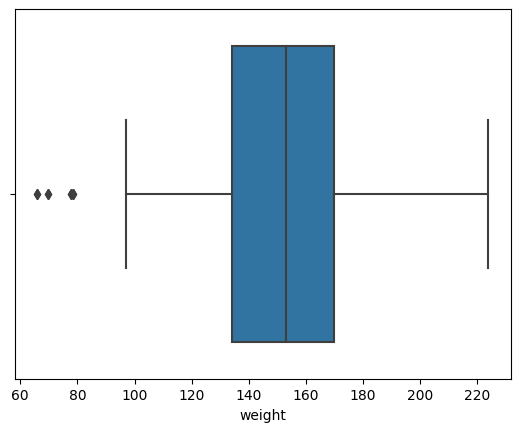

In [80]:
df['weight'] = np.where(df['weight'] >= upper_tail, upper_tail, df['weight'])
sns.boxplot(x = df['weight'])

<AxesSubplot: xlabel='weight'>

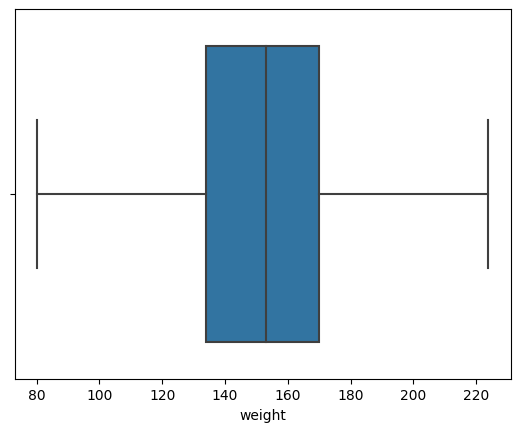

In [81]:
df['weight'] = np.where(df['weight'] <= lower_tail, lower_tail, df['weight'])
sns.boxplot(x = df['weight'])

##### resoloution

<AxesSubplot: xlabel='resoloution'>

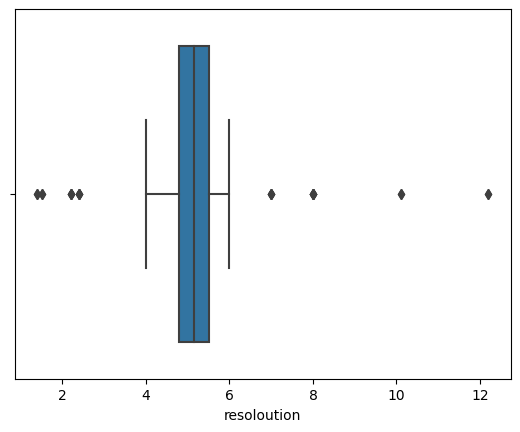

In [84]:
sns.boxplot(x = df['resoloution'])

<AxesSubplot: >

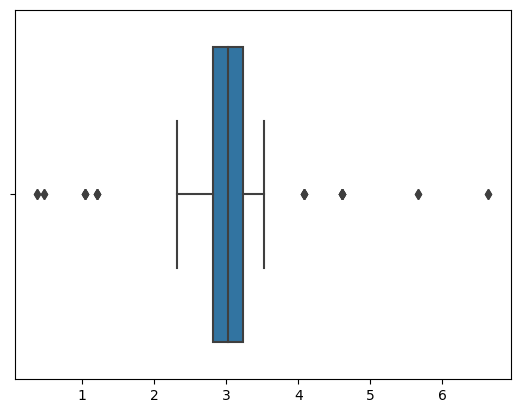

In [85]:
sns.boxplot(x = boxcox(df["resoloution"])[0])

<AxesSubplot: xlabel='resoloution', ylabel='Density'>

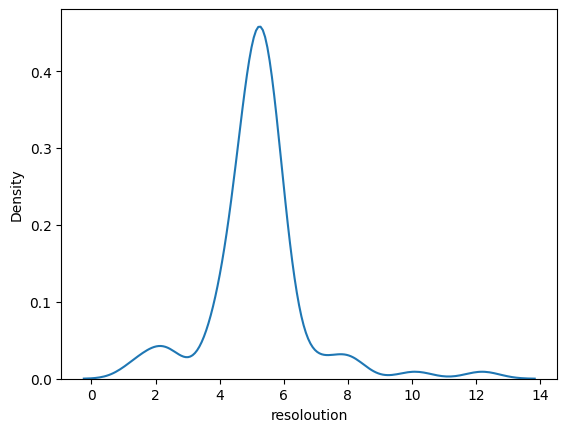

In [86]:
sns.kdeplot(x = df["resoloution"])

In [88]:
q1 = df['resoloution'].quantile(0.25)
q3 = df['resoloution'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

6.550000000000001

In [89]:
df.loc[df['resoloution'] >= upper_tail]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
37,662,2124,35.0,223.85,10.1,224,4,2.26,16.0,2.000,5.00,2.0,7400,7.8
40,662,2124,37.0,223.85,10.1,224,4,2.26,16.0,2.000,5.00,2.0,7400,7.8
51,43,1347,43.0,223.85,7.0,170,2,1.30,4.0,0.512,2.00,0.0,2820,9.1
62,43,1347,67.0,223.85,7.0,170,2,1.30,4.0,0.512,2.00,0.0,2820,9.1
67,56,2044,82.0,223.85,8.0,283,8,2.00,8.0,2.000,5.00,2.0,4060,7.3
72,56,2044,93.0,223.85,8.0,283,8,2.00,8.0,2.000,5.00,2.0,4060,7.3
77,66,1396,101.0,223.85,7.0,170,4,1.20,4.0,1.000,3.00,0.0,3240,9.0
84,237,1646,113.0,223.85,8.0,160,4,1.20,8.0,1.000,5.00,5.0,4500,9.0
85,66,1396,114.0,223.85,7.0,170,4,1.20,4.0,1.000,3.00,0.0,3240,9.0
90,237,1646,141.0,223.85,8.0,160,4,1.20,8.0,1.000,5.00,5.0,4500,9.0


In [90]:
df.loc[df['resoloution'] <= lower_tail]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
81,1026,791,106.0,80.25,1.5,121,1,0.208,0.000,0.004,0.0,0.0,800,13.2
86,1026,791,114.0,80.25,1.5,121,1,0.208,0.000,0.004,0.0,0.0,800,13.2
101,827,833,201.0,80.25,2.4,166,0,0.000,0.000,0.008,0.0,0.0,1100,12.9
105,827,833,213.0,80.25,2.4,166,0,0.000,0.000,0.008,0.0,0.0,1100,12.9
110,64,754,299.0,80.25,2.4,167,0,0.000,0.004,0.004,0.0,0.0,850,12.4
113,64,754,308.0,80.25,2.4,167,0,0.000,0.004,0.004,0.0,0.0,850,12.4
125,1198,705,423.0,110.00,2.2,128,0,0.000,0.128,0.032,2.0,0.0,900,15.6
126,1198,705,427.0,110.00,2.2,128,0,0.000,0.128,0.032,2.0,0.0,900,15.6
140,701,628,899.5,102.90,2.2,128,0,0.000,0.256,0.128,1.3,0.0,950,18.5
141,701,628,899.5,102.90,2.2,128,0,0.000,0.256,0.128,1.3,0.0,950,18.5


<AxesSubplot: xlabel='resoloution'>

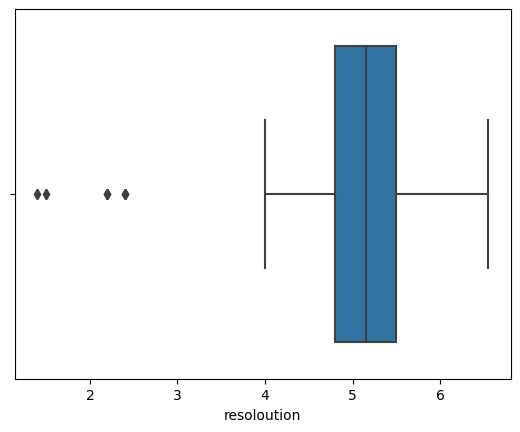

In [91]:
df['resoloution'] = np.where(df['resoloution'] >= upper_tail, upper_tail, df['resoloution'])
sns.boxplot(x = df['resoloution'])

<AxesSubplot: xlabel='resoloution'>

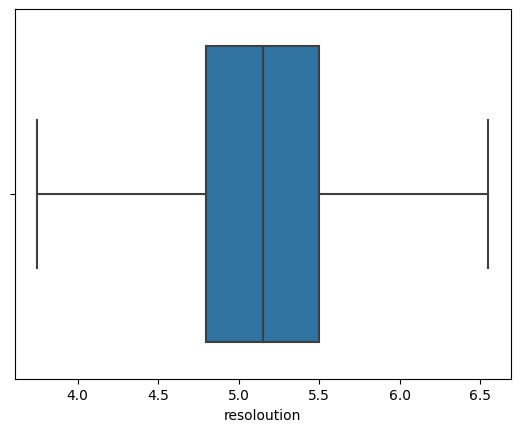

In [92]:
df['resoloution'] = np.where(df['resoloution'] <= lower_tail, lower_tail, df['resoloution'])
sns.boxplot(x = df['resoloution'])

<AxesSubplot: >

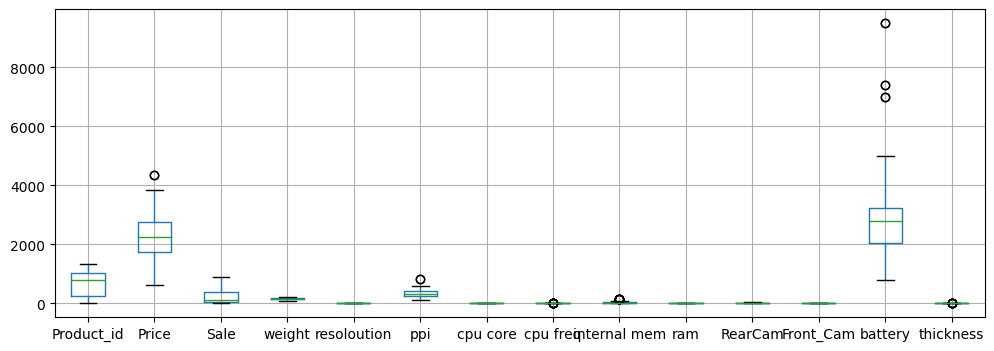

In [94]:
plt.figure(figsize= (12,4))
df.boxplot()

##### ppi

<AxesSubplot: >

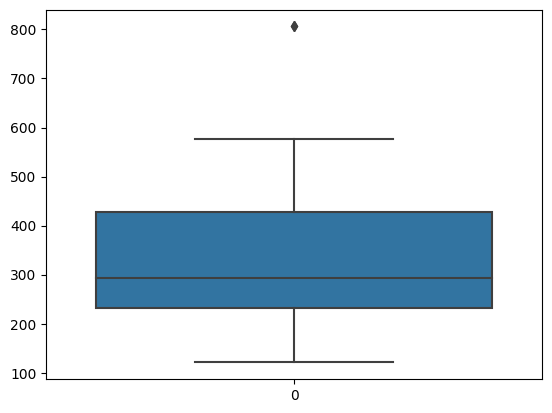

In [95]:
sns.boxplot(df["ppi"])

<AxesSubplot: xlabel='ppi', ylabel='Density'>

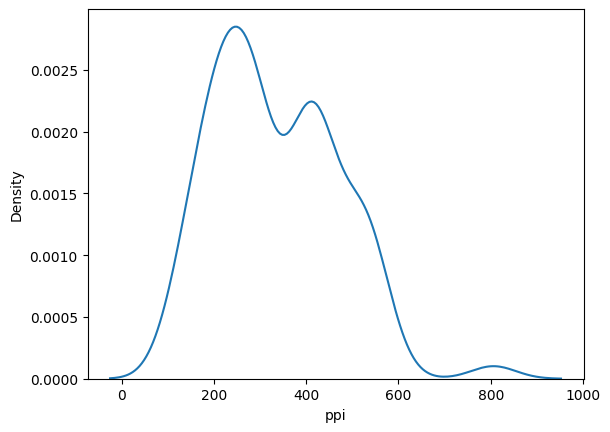

In [96]:
sns.kdeplot(x = df["ppi"])

<AxesSubplot: >

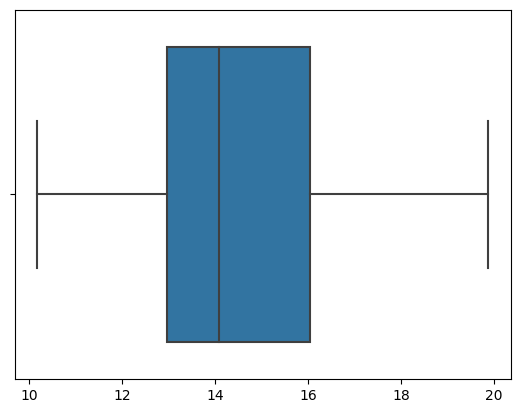

In [97]:
sns.boxplot(x = boxcox(df["ppi"])[0])

In [98]:
df["ppi"] = boxcox(df["ppi"])[0]

<AxesSubplot: >

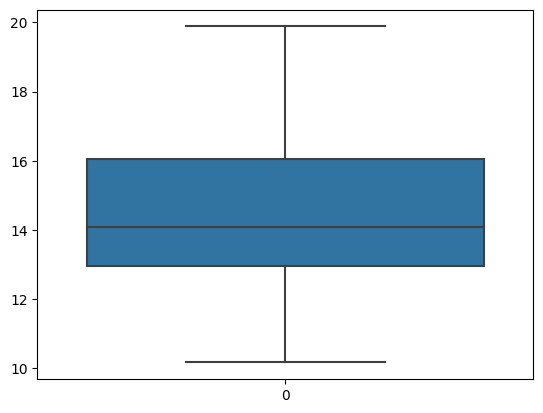

In [100]:
sns.boxplot(df["ppi"])

# Model Training Without Removing Outliers

In [66]:
x = df.drop("Price", axis=1)
y = df["Price"]
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=22, test_size=0.2)

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [68]:
lin_reg.score(x_test, y_test)

0.9373400551338239

In [69]:
lin_reg.score(x_train, y_train)

0.9543158364833165